## Import Libraries

In [3]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

## Read data files

In [4]:
df_july_p1 = pd.read_excel('/home/shiva/Documents/UTS/02_Courses/DVN/DVN/AT2 Part2/Data/data Jul 07 - Jul 20 - Part1.xlsx')
df_july_p2 = pd.read_excel('/home/shiva/Documents/UTS/02_Courses/DVN/DVN/AT2 Part2/Data/data Jul 07 - Jul 20 - Part2.xlsx')
df_july_aug = pd.read_excel('/home/shiva/Documents/UTS/02_Courses/DVN/DVN/AT2 Part2/Data/data Jul 21 - Aug 03.xlsx')
df_aug = pd.read_excel('/home/shiva/Documents/UTS/02_Courses/DVN/DVN/AT2 Part2/Data/data Aug 04 - Aug 24.xlsx')

del df_july_p1['Unnamed: 7']


In [5]:
df_july_p1.head(5)

,Date,Network,Channel,Contribution,Impression,Site Visits,Spend
0,2019-07-07,NetA,ChannelA1,0.0,0,0.246914,0
1,2019-07-07,NetA,ChannelA1,0.0,0,0.259259,0
2,2019-07-07,NetA,ChannelA1,0.0,0,0.111111,0
3,2019-07-07,NetA,ChannelA1,0.0,0,0.074074,0
4,2019-07-07,NetA,ChannelA1,0.0,0,0.098765,0


In [6]:
df_july_p2.head(5)

,Hour,Weekday,Month,Market,Creative,Country,Product
0,0,Sun,Jul,ADE,Creative1,AU,Product1
1,1,Sun,Jul,ADE,Creative1,AU,Product1
2,2,Sun,Jul,ADE,Creative1,AU,Product1
3,3,Sun,Jul,ADE,Creative1,AU,Product1
4,4,Sun,Jul,ADE,Creative1,AU,Product1


## Merge July Data Frames

In [7]:
df_july=pd.merge(df_july_p1, df_july_p2, left_index=True, right_index=True)

In [8]:
df_july.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136080 entries, 0 to 136079
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          136080 non-null  datetime64[ns]
 1   Network       136080 non-null  object        
 2   Channel       136080 non-null  object        
 3   Contribution  136080 non-null  float64       
 4   Impression    136080 non-null  int64         
 5   Site Visits   136080 non-null  float64       
 6   Spend         136080 non-null  int64         
 7   Hour          136080 non-null  int64         
 8   Weekday       136080 non-null  object        
 9   Month         136080 non-null  object        
 10  Market        136080 non-null  object        
 11  Creative      136080 non-null  object        
 12  Country       136080 non-null  object        
 13  Product       136080 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 

## Create Final Data frame for plotting

In [9]:
df_july_aug_temp = df_july.append(df_july_aug)
df_july_aug_final = df_july_aug_temp.append(df_aug).reset_index()

In [10]:
df_july_aug_final["Market"].unique()

array(['ADE', 'BRI', 'MEL', 'PER', 'SYD'], dtype=object)

In [11]:
df_july_aug_final.rename(columns={"Market": "State"}, inplace = True)

## Sunburst Plot - Site Visits

In [12]:
fig = px.sunburst(df_july_aug_final, path=['State','Channel','Product'], values='Site Visits', color_continuous_scale='RdBu')
fig.update_layout(title_text='Site Visits across state, channel and product for the period July 2019-Aug 2019', title_x=0.5)
fig.show()

## Read text data

In [13]:
df_fake_news = pd.read_csv('/home/shiva/Documents/UTS/02_Courses/DVN/DVN/AT2 Part2/Data/Fake.csv')

In [14]:
#print(str(df_fake_news['title']))
title = df_fake_news['title']
title=title.str.replace(' ','') # <-----to see program name in full
title_text=' '.join(title)

## Print Text

In [89]:
print(title_text)









 EvenTrump’sBestFriendJoeScarboroughCan’tHandleHis‘Disqualifying’KKKSupport(VIDEO) WATCH:LeonardoDiCaprioGaveanOscarAcceptanceSpeechThatPutRepublicansToShame PowerfulOscarPerformanceByLadyGagaBringsAudienceToTears(VIDEO/TWEET) VicePresidentJoeBidenBringsOscarsToAnEmotionalHaltWithPowerfulMessage(VIDEO) WhoopiGoldbergWasConfusedForOprahAtTheOscars,TwitterHilariouslyResponds(TWEETS) MeetTheINCREDIBLYRacistGOPSenatorThatJustEndorsedTrump(VIDEO) ChrisRockPerfectlyROASTSLilyWhiteOscars:‘You’reDamnRightHollywoodIsRacist’(VIDEO) JustFOURHomeLoansWereGivenToAfrican-AmericansInThisMajorCityInAWholeYear PastorShotAndKilledInTheMiddleOfChurchServiceInOhio IranStunsWorldInFirstElectionSinceNuclearAgreement,Pro-WestReformistsSweepSeats TedCruzBLASTSTrumpForAllegedMobTies(VIDEO) HillaryClintonRetweetsBernieSanders,AndForAGoodReason(IMAGE) MSNBCReactsToMelissaHarris-Perry’sLetter,AndTheirResponseIsShameful PresidentVicente‘I’mNotBuildingThatF*ckingWall’FoxSaysTrumpIsLikeHitler(VIDEO) GOPEx-Go

## Plot Wordcloud

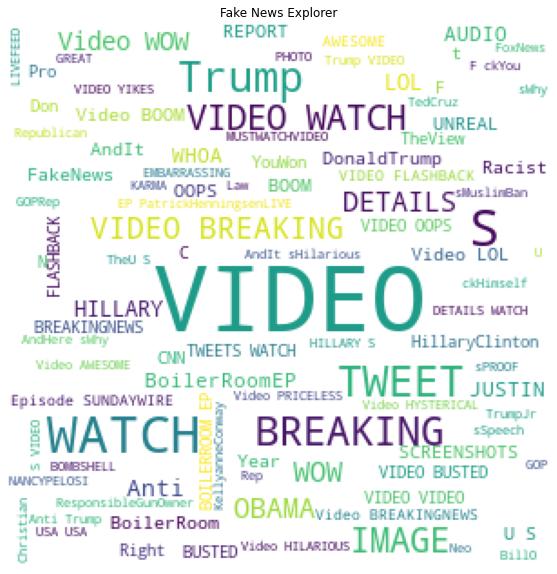

In [15]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS


stopwords = set(STOPWORDS)
stopwords.update(["of","In","With"])

plt.subplots(figsize = (10,10))
 

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=50, 
                          width = 300,
                          height = 300
                         ).generate(title_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Fake News Explorer') 
plt.show()

## Read KPI and Independent VAR Excel File

In [16]:
df_KPI = pd.read_excel('/home/shiva/Documents/UTS/02_Courses/DVN/DVN/AT2 Part2/Data/KPI and Independent var.xlsx')

In [54]:
df_KPI.head()

,State,Date,KPI_A,KPI_B,VAR1,VAR2,year,month
0,QLD,2015-12-27,126581,102859,43674.610793,3606.160524,2015,Dec
1,QLD,2016-01-03,148738,423723,47080.429066,3606.160524,2016,Jan
2,QLD,2016-01-10,143475,425240,48683.167077,2203.764765,2016,Jan
3,QLD,2016-01-17,142818,428319,41070.161526,2404.107016,2016,Jan
4,QLD,2016-01-24,140522,421368,20835.594140,2003.422513,2016,Jan


## Trend and Seasonality of KPI_B for VIC and NSW

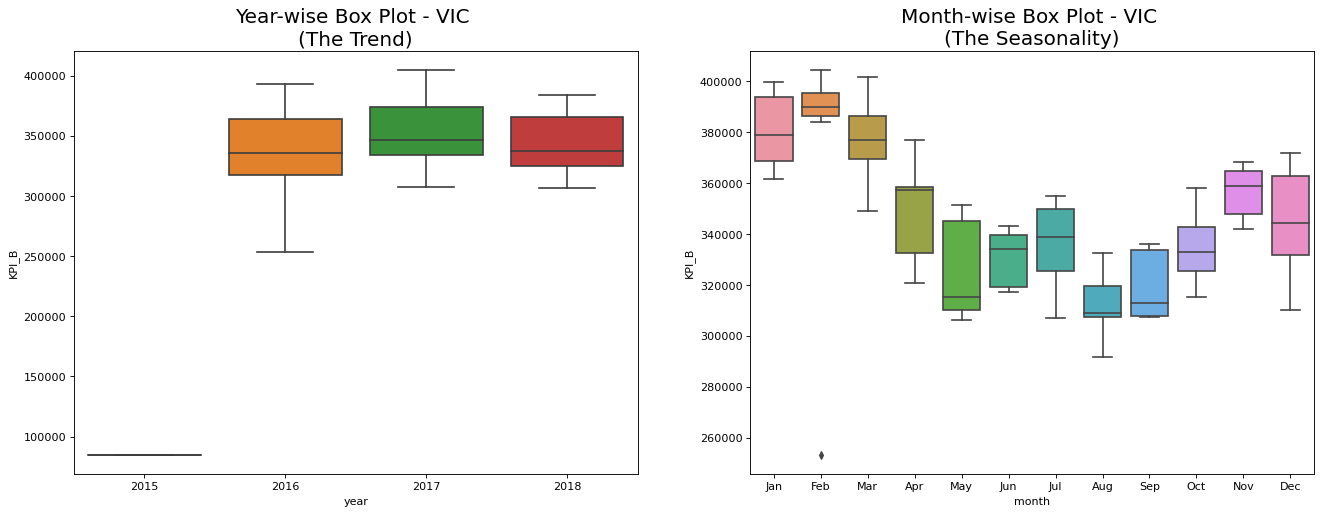

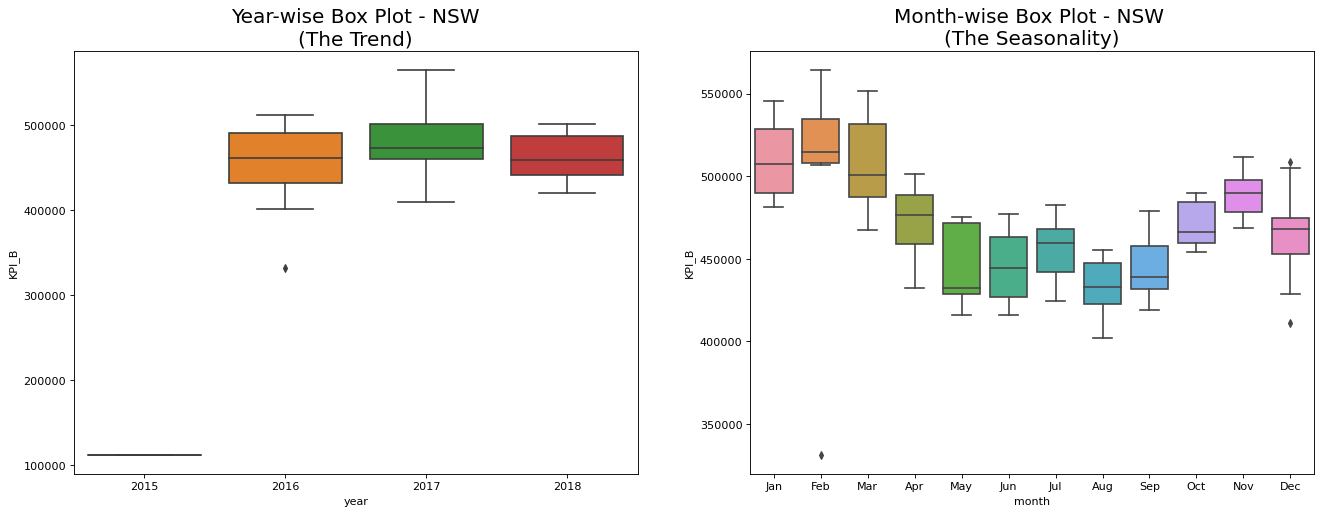

In [53]:
import numpy as np
import seaborn as sns

# Prepare data
df_KPI['year'] = [d.year for d in df_KPI.Date]
df_KPI['month'] = [d.strftime('%b') for d in df_KPI.Date]
years = df_KPI['year'].unique()

df_KPI_VIC = df_KPI[df_KPI['State']=='VIC']

df_KPI_NSW = df_KPI[df_KPI['State']=='NSW']


# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='KPI_B', data=df_KPI_VIC, ax=axes[0])
sns.boxplot(x='month', y='KPI_B', data=df_KPI_VIC.loc[~df_KPI_VIC.year.isin([2015, 2018]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot - VIC \n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot - VIC \n(The Seasonality)', fontsize=18)
plt.show()



# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='KPI_B', data=df_KPI_NSW, ax=axes[0])
sns.boxplot(x='month', y='KPI_B', data=df_KPI_NSW.loc[~df_KPI_NSW.year.isin([2015, 2018]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot - NSW\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot - NSW \n(The Seasonality)', fontsize=18)
plt.show()

### Findings

#### 2017 has been the best year looking at the KPI_B numbers for both VIC and NSW looking at the trend plot above. The KPI_B median values are higher by approximately 10k for NSW for 2016-2018

#### From the seasonality plot we can clearly see that KPI values are at the highest in the first quarter(Q1) of the year for both VIC and NSW, takes a dip in Q2 and Q3 before showing some improvement in the numbers in Q4.  

## Relationship between VAR1 and KPI_A for NSW

In [74]:
fig = px.scatter(df_KPI_NSW, x="VAR1", y="KPI_A", trendline= "ols")
fig.update_layout(title="Relationship between VAR1 and KPI A for NSW", xaxis_title='VAR1', yaxis_title='KPI A')
fig.show()

fig = px.scatter(df_KPI_NSW, x="VAR2", y="KPI_A", trendline= "ols")
fig.update_layout(title="Relationship between VAR2 and KPI A for NSW", xaxis_title='VAR2', yaxis_title='KPI A')
fig.show()

### Findings

#### Though there's a linear relationship indicated by the plots above between VAR1 and VAR2 and KPI A, the variance is high between 0-50k for VAR1 and 0-100k for VAR2. Both the distribution are clearly heteroscedastic